# Funciones de distribución de probabilidades

## Distribución Uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
a=1
b=100
n=1000000
data = np.random.uniform(a,b,n)

(array([ 99968., 100161.,  99743., 100196., 100209., 100010.,  99975.,
        100197.,  99138., 100403.]),
 array([ 1.00012027, 10.90010738, 20.80009449, 30.7000816 , 40.60006872,
        50.50005583, 60.40004294, 70.30003005, 80.20001716, 90.10000427,
        99.99999138]),
 <a list of 10 Patch objects>)

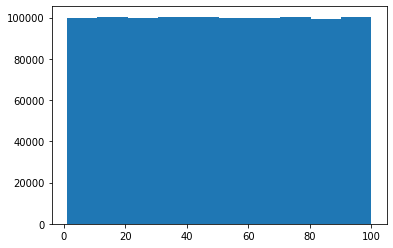

In [12]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [20]:
data=np.random.randn(1000000) #generar valores aleatorios

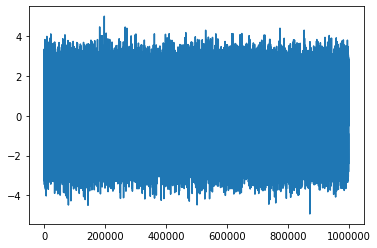

In [23]:
x=range(1,1000001)
plt.plot(x,data)

(array([3.70000e+01, 1.52600e+03, 2.41760e+04, 1.43777e+05, 3.44162e+05,
        3.33709e+05, 1.30581e+05, 2.06650e+04, 1.33800e+03, 2.90000e+01]),
 array([-4.92510304, -3.93333093, -2.94155883, -1.94978672, -0.95801461,
         0.03375749,  1.0255296 ,  2.01730171,  3.00907381,  4.00084592,
         4.99261802]),
 <a list of 10 Patch objects>)

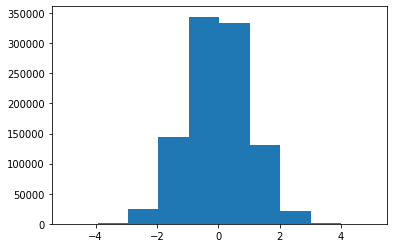

In [21]:
%matplotlib inline
plt.hist(data)

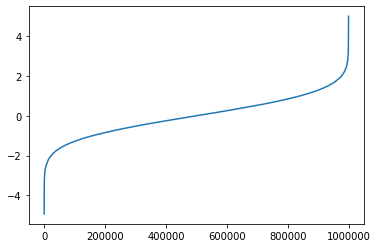

In [24]:
plt.plot(x,sorted(data)) #Otra forma de ver la campana de Gauss

(array([  13.,  154.,  691., 1740., 2770., 2596., 1464.,  489.,   72.,
          11.]),
 array([-3.54856121, -1.68727418,  0.17401284,  2.03529987,  3.8965869 ,
         5.75787392,  7.61916095,  9.48044797, 11.341735  , 13.20302202,
        15.06430905]),
 <a list of 10 Patch objects>)

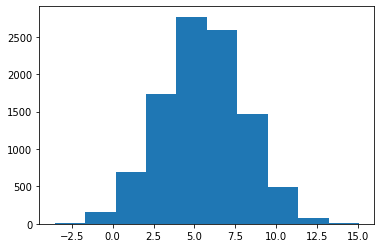

In [28]:
mu=5.5 #media
sd=2.5 #desvío
Z_10000=np.random.randn(10000)
data=mu+sd*Z_10000 # Z = (X-mu) / sd -> N(0,1), X = mu + sd * Z == Teorema Central del Límite
plt.hist(data)

In [30]:
data=np.random.randn(2,4) #Utilizada para crear datasets
data

array([[-0.07488417, -0.49688459,  0.02752819,  0.9729432 ],
       [-2.61311557, -1.22881488, -0.8224776 ,  1.28611079]])

## La simulación de Monte Carlo

* Generamos 2 números aleatorios uniforme entre 0 y 1, en total 1000 veces.
* Calcular x^2 + y^2:
    * Si el valor es inferior a 1 estamos dentro del círculo.
    * Si el valor es superior a 1 estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (ejemplo 100) para obtener (100) diferentes aproximaciones de pi.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [9]:
def pi_montecarlo(n,n_exp):
    pi_avg = 0
    n = 10000
    n_exp = 100
    pi_value_list = []
    for i in range(n_exp):
        value=0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.143040000000001


(3.143040000000001, [<matplotlib.lines.Line2D at 0x1c7d058de88>])

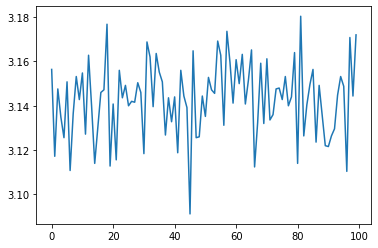

In [10]:
pi_montecarlo(10000,100)

### Dummy Data Sets

In [4]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), #distribución normal
        'B' : 1.5 + 2.5 * np.random.randn(n), #distribución normal con media 1.5 y desvío 2.5
        'C' : np.random.uniform(5,32,n) #distribución uniforme
    }
)

In [5]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001909,1.499670,18.503680
std,0.999507,2.501473,7.791361
min,-4.547038,-10.339231,5.000041
25%,-0.676159,-0.184584,11.759199
50%,-0.002457,1.496371,18.501497
75%,0.673369,3.186918,25.249287
max,4.407026,14.718137,31.999954


(array([9.70000e+01, 3.05800e+03, 3.87210e+04, 1.91792e+05, 3.75059e+05,
        2.90532e+05, 8.93790e+04, 1.08560e+04, 4.96000e+02, 1.00000e+01]),
 array([-10.33923075,  -7.833494  ,  -5.32775725,  -2.82202049,
         -0.31628374,   2.18945301,   4.69518977,   7.20092652,
          9.70666328,  12.21240003,  14.71813678]),
 <a list of 10 Patch objects>)

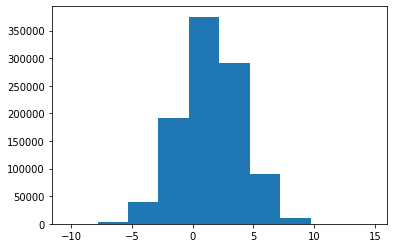

In [6]:
plt.hist(data["B"])

(array([ 99731., 100051.,  99948.,  99984., 100222.,  99889., 100010.,
        100257.,  99998.,  99910.]),
 array([ 5.00004054,  7.70003189, 10.40002323, 13.10001458, 15.80000593,
        18.49999728, 21.19998863, 23.89997998, 26.59997132, 29.29996267,
        31.99995402]),
 <a list of 10 Patch objects>)

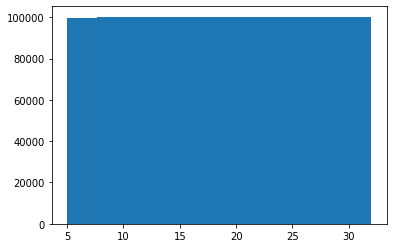

In [7]:
plt.hist(data["C"])

In [11]:
data = pd.read_csv("../data/datasets/customer-churn-model/Customer Churn Model.txt")

In [12]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
colum_names = data.columns.values.tolist()

In [15]:
a = len(colum_names)
a

21

In [19]:
new_data = pd.DataFrame(
{
    'Column Name': colum_names,
    'A' : np.random.randn(a),
    'B' : np.random.uniform(0,1,a)
}, index = range(42, 42 + a)
)

In [20]:
new_data

,Column Name,A,B
42,State,-0.625319,0.723781
43,Account Length,0.995018,0.129955
44,Area Code,-1.528381,0.377230
45,Phone,0.571026,0.819743
46,Int'l Plan,2.096480,0.628505
47,VMail Plan,0.289833,0.113843
48,VMail Message,-0.229697,0.464180
49,Day Mins,0.127664,0.620595
50,Day Calls,-0.104232,0.158352
51,Day Charge,-1.178131,0.852973
